### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso

from Florian.weather import getCleanWeather

In [2]:
#einlesen der Daten

station_data = pd.read_csv(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\bluebikes_stations.csv")
data = pd.read_csv(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\bluebikes_idle_time_v3.csv")
weather_data = getCleanWeather(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\Boston")
loc_feature_data = pd.read_csv(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\bluebikes_station_location_feature.csv")

### Getting an overview and casting the time-attributes

In [3]:
print(len(station_data))
station_data.head(100)

313


,station_id,lat,lon
0,67,42.358100,-71.093198
1,139,42.361780,-71.108100
2,36,42.349792,-71.077338
3,10,42.350406,-71.108279
4,9,42.351187,-71.115852
...,...,...,...
95,150,42.344137,-71.052608
96,173,42.310600,-71.053913
97,5,42.341814,-71.090179
98,151,42.358155,-71.052163


In [4]:
print(len(data))
data.head(100)

3081461


,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59
...,...,...,...,...,...,...,...
95,2017-01-01 11:34:53,2017-01-01 11:37:36,118,100,1866,6,0 days 02:43:20
96,2017-01-01 11:35:25,2017-01-01 11:54:19,16,27,1487,6,0 days 09:54:21
97,2017-01-01 11:35:34,2017-01-01 11:54:09,16,27,1376,6,0 days 09:54:30
98,2017-01-01 11:36:32,2017-01-01 11:55:49,81,163,152,6,0 days 11:36:32


In [5]:
print(len(weather_data))
weather_data.head(100)

21082


,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.00,1.0
1,Boston,2017-01-01 01:54:00,5.0,11,Light Rain,1012.49,20.0,0.00,1.0
2,Boston,2017-01-01 02:54:00,5.0,11,Light Rain,1011.81,24.0,0.51,1.0
3,Boston,2017-01-01 03:33:00,5.0,11,Light Rain / Windy,1011.47,39.0,0.51,-1.0
4,Boston,2017-01-01 03:54:00,4.0,11,Light Rain,1011.47,30.0,0.51,-1.0
...,...,...,...,...,...,...,...,...,...
95,Boston,2017-01-04 00:54:00,7.0,40,Heavy Rain,1003.01,30.0,6.35,2.0
96,Boston,2017-01-04 01:14:00,6.0,12,Rain,1002.33,31.0,2.03,1.0
97,Boston,2017-01-04 01:32:00,6.0,11,Light Rain,1001.32,31.0,3.05,1.0
98,Boston,2017-01-04 01:54:00,6.0,11,Light Rain,1000.30,31.0,3.30,1.0


In [6]:
print(len(loc_feature_data))
loc_feature_data.head(100)

2915398


,station_id_x,station_density,station_id_y,city_center_distance,boston_university_distance,fenway_park_distance,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,...,north_station_distance,back_bay_station_distance,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,idle_time_hours
0,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,0.116111
1,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:42:04,2017-01-01 00:46:25,67,179,1102,6,0 days 00:42:04,0.701111
2,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 03:00:00,2017-01-01 03:03:45,67,178,972,6,0 days 01:34:03,1.567500
3,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 04:03:37,2017-01-01 04:24:27,67,67,532,6,0 days 02:37:40,2.627778
4,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 11:10:04,2017-01-01 11:31:10,67,74,532,6,0 days 00:12:15,0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 17:31:44,2017-01-04 17:43:35,67,88,857,2,0 days 00:32:41,0.544722
96,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 17:55:57,2017-01-04 18:07:10,67,12,393,2,0 days 00:56:54,0.948333
97,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 18:31:43,2017-01-04 18:35:52,67,178,1483,2,0 days 00:06:43,0.111944
98,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 19:29:27,2017-01-04 19:34:51,67,68,222,2,0 days 00:03:14,0.053889


In [7]:
data.dtypes

start_time          object
end_time            object
start_station_id     int64
end_station_id       int64
bike_id              int64
weekday              int64
idle_time           object
dtype: object

In [8]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['idle_time'] = pd.to_timedelta(data['idle_time'])
data.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id              int64
end_station_id                int64
bike_id                       int64
weekday                       int64
idle_time           timedelta64[ns]
dtype: object

In [9]:
weather_data.dtypes

city                               object
timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                         int64
cloud_cover_description            object
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object

In [10]:
loc_feature_data.dtypes

station_id_x                       int64
station_density                  float64
station_id_y                       int64
city_center_distance             float64
boston_university_distance       float64
fenway_park_distance             float64
harvard_university_distance      float64
mit_distance                     float64
boston_common_distance           float64
boston_public_garden_distance    float64
newbury_street_distance          float64
south_station_distance           float64
north_station_distance           float64
back_bay_station_distance        float64
start_time                        object
end_time                          object
start_station_id                   int64
end_station_id                     int64
bike_id                            int64
weekday                            int64
idle_time                         object
idle_time_hours                  float64
dtype: object

In [11]:
loc_feature_data['start_time'] = pd.to_datetime(loc_feature_data['start_time'])
loc_feature_data['end_time'] = pd.to_datetime(loc_feature_data['end_time'])
loc_feature_data['idle_time'] = pd.to_timedelta(loc_feature_data['idle_time'])
loc_feature_data.dtypes

station_id_x                               int64
station_density                          float64
station_id_y                               int64
city_center_distance                     float64
boston_university_distance               float64
fenway_park_distance                     float64
harvard_university_distance              float64
mit_distance                             float64
boston_common_distance                   float64
boston_public_garden_distance            float64
newbury_street_distance                  float64
south_station_distance                   float64
north_station_distance                   float64
back_bay_station_distance                float64
start_time                        datetime64[ns]
end_time                          datetime64[ns]
start_station_id                           int64
end_station_id                             int64
bike_id                                    int64
weekday                                    int64
idle_time           

### Removing the upper 5% by idle-time

In [12]:
quantile_95th = data['idle_time'].quantile(0.95)
upper_5_percent = data[data['idle_time'] >= quantile_95th]
upper_5_percent

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
42,2017-01-01 08:26:17,2017-01-01 08:34:06,54,57,1316,6,0 days 08:26:17
44,2017-01-01 08:42:34,2017-01-01 08:51:33,89,118,1671,6,0 days 08:42:34
48,2017-01-01 09:03:01,2017-01-01 09:14:31,96,76,497,6,0 days 09:03:01
50,2017-01-01 09:21:34,2017-01-01 09:25:06,8,41,805,6,0 days 08:41:06
52,2017-01-01 09:27:34,2017-01-01 09:44:39,9,97,673,6,0 days 08:43:24
...,...,...,...,...,...,...,...
3081247,2018-12-31 17:29:14,2018-12-31 17:50:38,331,95,3850,0,1 days 05:34:13
3081284,2018-12-31 17:46:44,2018-12-31 17:54:18,344,66,3659,0,0 days 22:55:52
3081306,2018-12-31 17:58:44,2018-12-31 18:09:37,82,66,3915,0,1 days 05:12:00
3081358,2018-12-31 18:36:19,2018-12-31 18:47:09,13,59,3506,0,0 days 10:37:18


In [13]:
print(len(data))
data = data.drop(upper_5_percent.index)
print(len(data))

3081461
2927385


### Merging all Data together (Except the station-data)

In [14]:
merged_data = pd.merge_asof(data.sort_values('start_time'), weather_data.sort_values('timestamp'),
                          left_on='start_time', right_on='timestamp',
                          direction='nearest')
print(len(merged_data))
merged_data.head(100)

2927385


,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.0,1.0
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.0,1.0
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.0,1.0
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.0,1.0
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-01-01 12:25:31,2017-01-01 12:28:41,178,75,1094,6,0 days 00:12:18,Boston,2017-01-01 12:54:00,3.0,28,Mostly Cloudy,1014.52,24.0,0.0,-2.0
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,28,Mostly Cloudy,1014.52,24.0,0.0,-2.0
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,28,Mostly Cloudy,1014.52,24.0,0.0,-2.0
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,28,Mostly Cloudy,1014.52,24.0,0.0,-2.0


In [15]:
print(len(loc_feature_data))
loc_feature_data.head(100)

2915398


,station_id_x,station_density,station_id_y,city_center_distance,boston_university_distance,fenway_park_distance,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,...,north_station_distance,back_bay_station_distance,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,idle_time_hours
0,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,0.116111
1,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:42:04,2017-01-01 00:46:25,67,179,1102,6,0 days 00:42:04,0.701111
2,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 03:00:00,2017-01-01 03:03:45,67,178,972,6,0 days 01:34:03,1.567500
3,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 04:03:37,2017-01-01 04:24:27,67,67,532,6,0 days 02:37:40,2.627778
4,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 11:10:04,2017-01-01 11:31:10,67,74,532,6,0 days 00:12:15,0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 17:31:44,2017-01-04 17:43:35,67,88,857,2,0 days 00:32:41,0.544722
96,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 17:55:57,2017-01-04 18:07:10,67,12,393,2,0 days 00:56:54,0.948333
97,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 18:31:43,2017-01-04 18:35:52,67,178,1483,2,0 days 00:06:43,0.111944
98,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-04 19:29:27,2017-01-04 19:34:51,67,68,222,2,0 days 00:03:14,0.053889


In [16]:
print(merged_data['start_time'].nunique())
print(len(merged_data))

2760917
2927385


In [17]:
print(loc_feature_data['start_time'].nunique())
print(len(loc_feature_data))

2749873
2915398


In [18]:
(loc_feature_data['station_id_x'] == loc_feature_data['station_id_y']).all()

True

In [19]:
merged_data = pd.merge_asof(merged_data.sort_values('start_time'), loc_feature_data.sort_values('start_time'),
                          left_on='start_time', right_on='start_time',
                          direction='nearest')
print(len(merged_data))
merged_data.head(100)

2927385


,start_time,end_time_x,start_station_id_x,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,south_station_distance,north_station_distance,back_bay_station_distance,end_time_y,start_station_id_y,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,3.195646,2.760200,1.904668,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,1.839755,2.198291,0.323908,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,1.839755,2.198291,0.323908,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,2.691106,3.160198,0.966290,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,4.374321,4.225473,2.747706,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-01-01 12:25:31,2017-01-01 12:28:41,178,75,1094,6,0 days 00:12:18,Boston,2017-01-01 12:54:00,3.0,...,3.882150,3.365978,2.543649,2017-01-01 12:28:41,178,75,1094,6,0 days 00:12:18,0.205000
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,3.462882,3.491928,1.804373,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,4.432321,3.646282,3.274807,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,3.970496,2.855296,3.258031,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,1.730278


### Cleaning of the merged data

In [20]:
(merged_data['station_id_x'] == merged_data['station_id_y']).all()

True

In [21]:
merged_data = merged_data.rename(columns={'station_id_x': 'station_id'})
merged_data = merged_data.drop('station_id_y', axis=1)
merged_data.head(100)

,start_time,end_time_x,start_station_id_x,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,south_station_distance,north_station_distance,back_bay_station_distance,end_time_y,start_station_id_y,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,3.195646,2.760200,1.904668,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,1.839755,2.198291,0.323908,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,1.839755,2.198291,0.323908,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,2.691106,3.160198,0.966290,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,4.374321,4.225473,2.747706,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-01-01 12:25:31,2017-01-01 12:28:41,178,75,1094,6,0 days 00:12:18,Boston,2017-01-01 12:54:00,3.0,...,3.882150,3.365978,2.543649,2017-01-01 12:28:41,178,75,1094,6,0 days 00:12:18,0.205000
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,3.462882,3.491928,1.804373,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,4.432321,3.646282,3.274807,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,3.970496,2.855296,3.258031,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,1.730278


In [22]:
different_rows = merged_data[merged_data['end_time_x'] != merged_data['end_time_y']].copy()
different_rows

,start_time,end_time_x,start_station_id_x,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,south_station_distance,north_station_distance,back_bay_station_distance,end_time_y,start_station_id_y,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
44,2017-01-01 08:57:37,2017-01-01 09:01:31,179,67,1899,6,0 days 08:06:55,Boston,2017-01-01 08:54:00,3.0,...,4.537152,4.989389,2.834199,2017-01-01 09:05:12,30,27,312,6,0 days 00:13:39,0.227500
110,2017-01-01 12:37:54,2017-01-01 12:47:14,133,131,1376,6,0 days 00:02:19,Boston,2017-01-01 12:54:00,3.0,...,2.149403,2.984192,0.682440,2017-01-01 12:57:25,25,58,1240,6,0 days 01:47:38,1.793889
372,2017-01-01 22:23:54,2017-01-01 22:32:22,47,98,1320,6,0 days 04:06:24,Boston,2017-01-01 21:54:00,4.0,...,2.691106,3.160198,0.966290,2017-01-01 22:30:15,46,25,1375,6,0 days 04:44:13,4.736944
380,2017-01-01 23:10:36,2017-01-01 23:23:25,119,47,1883,6,0 days 08:21:11,Boston,2017-01-01 22:54:00,5.0,...,5.116433,4.364818,3.862621,2017-01-01 23:10:25,87,108,1163,6,0 days 00:02:39,0.044167
398,2017-01-02 07:34:29,2017-01-02 07:45:58,47,36,1547,0,0 days 08:11:04,Boston,2017-01-02 07:54:00,-1.0,...,0.025130,1.560954,1.704659,2017-01-02 07:44:26,22,42,1395,0,0 days 00:13:28,0.224444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927177,2018-12-31 17:29:46,2018-12-31 17:36:23,192,369,2991,0,0 days 08:05:55,Boston,2018-12-31 17:54:00,7.0,...,2.954493,2.178397,2.082194,2018-12-31 17:31:10,318,107,2524,0,0 days 00:13:06,0.218333
2927203,2018-12-31 17:43:44,2018-12-31 17:49:57,192,152,2934,0,0 days 08:19:53,Boston,2018-12-31 17:54:00,7.0,...,3.190125,2.531471,2.119972,2018-12-31 17:47:54,80,225,4461,0,0 days 00:00:46,0.012778
2927227,2018-12-31 17:57:26,2018-12-31 18:02:39,364,200,3701,0,0 days 00:23:35,Boston,2018-12-31 17:54:00,7.0,...,2.618645,3.401318,1.073662,2018-12-31 18:02:35,364,200,3655,0,0 days 00:23:35,0.393056
2927260,2018-12-31 18:19:58,2018-12-31 18:26:17,67,91,4019,0,0 days 00:30:29,Boston,2018-12-31 17:54:00,7.0,...,5.891798,4.985649,4.736843,2018-12-31 18:57:36,73,179,3578,0,0 days 02:20:10,2.336111


In [23]:
print(len(merged_data))
merged_data = merged_data.drop(different_rows.index)
print(len(merged_data))

2927385
2750379


In [24]:
merged_data = merged_data.rename(columns={'end_time_x': 'end_time'})
merged_data = merged_data.drop('end_time_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id_x,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,start_station_id_y,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,1.220776,3.195646,2.760200,1.904668,67,139,644,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,0.500724,1.839755,2.198291,0.323908,36,10,230,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,0.500724,1.839755,2.198291,0.323908,36,9,980,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,0.705148,2.691106,3.160198,0.966290,46,19,1834,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,2.049614,4.374321,4.225473,2.747706,10,8,230,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,1.127229,3.462882,3.491928,1.804373,33,9,1530,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,2.588599,4.432321,3.646282,3.274807,76,115,1391,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,2.724499,3.970496,2.855296,3.258031,95,90,714,6,0 days 01:43:49,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,5.156510,6.594280,5.375250,5.784258,115,118,1616,6,0 days 00:45:07,0.751944


In [25]:
(merged_data['start_station_id_x'] == merged_data['start_station_id_y']).all()

False

In [26]:
different_rows = merged_data[merged_data['start_station_id_x'] != merged_data['start_station_id_y']].copy()
different_rows

,start_time,end_time,start_station_id_x,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,start_station_id_y,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
49510,2017-03-22 08:31:32,2017-03-22 08:49:57,139,11,1293,2,0 days 08:00:24,Boston,2017-03-22 08:54:00,4.0,...,1.239992,1.403721,2.345826,0.508015,4,68,1824,2,0 days 07:14:04,7.234444
66987,2017-04-05 17:15:30,2017-04-05 17:23:14,186,151,802,2,0 days 08:12:08,Boston,2017-04-05 16:54:00,5.0,...,2.735274,0.711049,1.113310,2.244730,151,190,874,2,0 days 00:22:55,0.381944
134159,2017-04-25 08:17:03,2017-04-25 08:25:43,116,80,571,1,0 days 08:10:19,Boston,2017-04-25 07:54:00,8.0,...,2.724499,3.970496,2.855296,3.258031,95,189,607,1,0 days 00:05:22,0.089444
244740,2017-05-23 18:10:43,2017-05-23 18:24:54,21,30,518,1,0 days 00:13:27,Boston,2017-05-23 17:54:00,17.0,...,0.597348,1.815414,2.318215,0.139431,16,16,924,1,0 days 00:03:58,0.066111
280189,2017-06-01 20:20:29,2017-06-01 20:29:06,91,79,716,3,0 days 00:09:15,Boston,2017-06-01 20:31:00,19.0,...,1.031574,2.511445,3.230101,0.905287,57,45,743,3,0 days 00:36:41,0.611389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816674,2018-11-17 18:49:26,2018-11-17 18:55:22,225,79,4135,5,0 days 00:10:31,Boston,2018-11-17 18:54:00,8.0,...,0.147409,2.268180,2.553714,0.613300,61,53,4060,5,0 days 00:10:26,0.173889
2822023,2018-11-19 17:32:39,2018-11-19 17:36:48,22,65,2414,0,0 days 00:01:18,Boston,2018-11-19 17:36:00,4.0,...,2.927150,0.592943,1.748290,2.317974,157,20,88,0,0 days 00:14:46,0.246111
2842911,2018-11-28 17:11:59,2018-11-28 17:18:25,200,51,4188,2,0 days 00:06:06,Boston,2018-11-28 16:54:00,6.0,...,1.796631,2.162678,3.319086,1.246736,13,152,3793,2,0 days 05:19:01,5.316944
2878024,2018-12-08 07:28:29,2018-12-08 07:32:44,177,80,2466,5,0 days 08:02:50,Boston,2018-12-08 07:54:00,-5.0,...,1.078653,1.497097,1.465891,0.932362,58,16,3830,5,0 days 06:31:01,6.516944


In [27]:
print(len(merged_data))
merged_data = merged_data.drop(different_rows.index)
print(len(merged_data))

2750379
2750281


In [28]:
merged_data = merged_data.rename(columns={'start_station_id_x': 'start_station_id'})
merged_data = merged_data.drop('start_station_id_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,1.861094,1.220776,3.195646,2.760200,1.904668,139,644,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,0.669948,0.500724,1.839755,2.198291,0.323908,10,230,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,0.669948,0.500724,1.839755,2.198291,0.323908,9,980,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,1.640679,0.705148,2.691106,3.160198,0.966290,19,1834,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,3.067487,2.049614,4.374321,4.225473,2.747706,8,230,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,2.191063,1.127229,3.462882,3.491928,1.804373,9,1530,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,3.140557,2.588599,4.432321,3.646282,3.274807,115,1391,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,2.850488,2.724499,3.970496,2.855296,3.258031,90,714,6,0 days 01:43:49,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,5.462311,5.156510,6.594280,5.375250,5.784258,118,1616,6,0 days 00:45:07,0.751944


In [29]:
(merged_data['end_station_id_x'] == merged_data['end_station_id_y']).all()

False

In [30]:
different_rows = merged_data[merged_data['end_station_id_x'] != merged_data['end_station_id_y']].copy()
different_rows

,start_time,end_time,start_station_id,end_station_id_x,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,end_station_id_y,bike_id_y,weekday_y,idle_time_y,idle_time_hours
2800250,2018-11-13 14:27:24,2018-11-13 14:33:34,17,221,3346,1,0 days 00:15:48,Boston,2018-11-13 14:16:00,12.0,...,4.120566,3.379966,5.447405,4.768768,4.107549,68,3777,1,0 days 00:15:48,0.263333


In [31]:
print(len(merged_data))
merged_data = merged_data.drop(different_rows.index)
print(len(merged_data))

2750281
2750280


In [32]:
merged_data = merged_data.rename(columns={'end_station_id_x': 'end_station_id'})
merged_data = merged_data.drop('end_station_id_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,bike_id_y,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,644,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,230,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,980,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,1834,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,230,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,2.649365,2.191063,1.127229,3.462882,3.491928,1.804373,1530,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,3.462271,3.140557,2.588599,4.432321,3.646282,3.274807,1391,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,3.036094,2.850488,2.724499,3.970496,2.855296,3.258031,714,6,0 days 01:43:49,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,5.663479,5.462311,5.156510,6.594280,5.375250,5.784258,1616,6,0 days 00:45:07,0.751944


In [33]:
(merged_data['bike_id_x'] == merged_data['bike_id_y']).all()

False

In [34]:
different_rows = merged_data[merged_data['bike_id_x'] != merged_data['bike_id_y']].copy()
different_rows

,start_time,end_time,start_station_id,end_station_id,bike_id_x,weekday_x,idle_time_x,city,timestamp,temperature,...,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,bike_id_y,weekday_y,idle_time_y,idle_time_hours
27318,2017-02-22 15:57:30,2017-02-22 16:07:53,140,104,876,2,0 days 00:12:27,Boston,2017-02-22 15:54:00,9.0,...,6.631787,6.388864,5.951666,7.582853,6.439608,6.624238,1662,2,0 days 00:12:27,0.207500
46695,2017-03-20 14:44:17,2017-03-20 15:08:56,74,179,582,0,0 days 00:06:52,Boston,2017-03-20 14:54:00,6.0,...,4.750179,4.448283,3.893648,5.719546,4.799243,4.589817,476,0,0 days 00:06:52,0.114444
77389,2017-04-10 11:26:23,2017-04-10 11:50:30,67,81,1382,0,0 days 00:14:00,Boston,2017-04-10 11:54:00,11.0,...,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,1894,0,0 days 00:14:00,0.233333
79131,2017-04-10 17:33:11,2017-04-10 17:52:48,60,19,1137,0,0 days 00:13:57,Boston,2017-04-10 16:54:00,23.0,...,0.695426,0.743246,1.566418,1.600061,0.981193,1.505667,67,0,0 days 00:13:57,0.232500
80026,2017-04-10 19:40:18,2017-04-10 19:47:39,121,152,277,0,0 days 00:49:51,Boston,2017-04-10 19:54:00,24.0,...,2.758995,2.912713,3.471205,1.987391,3.553352,2.741883,1458,0,0 days 00:49:51,0.830833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878195,2018-12-08 10:21:20,2018-12-08 10:31:13,57,67,4137,5,0 days 00:40:51,Boston,2018-12-08 09:54:00,-6.0,...,2.070133,1.686972,1.031574,2.511445,3.230101,0.905287,2755,5,0 days 00:40:51,0.680833
2888212,2018-12-11 19:20:47,2018-12-11 19:27:04,59,4,3354,1,0 days 00:37:25,Boston,2018-12-11 18:54:00,3.0,...,0.720847,1.025249,1.988508,0.351836,1.587231,1.377331,3913,1,0 days 00:37:25,0.623611
2895822,2018-12-13 21:31:59,2018-12-13 21:43:20,377,177,3866,3,0 days 00:24:05,Boston,2018-12-13 21:54:00,1.0,...,4.052775,3.866193,3.660657,4.980976,3.792258,4.240577,3864,3,0 days 00:24:05,0.401389
2918519,2018-12-22 20:16:53,2018-12-22 20:28:45,178,74,3755,5,0 days 00:20:39,Boston,2018-12-22 19:54:00,8.0,...,2.930479,2.547859,1.826880,3.882150,3.365978,2.543649,2706,5,0 days 00:20:39,0.344167


In [35]:
print(len(merged_data))
merged_data = merged_data.drop(different_rows.index)
print(len(merged_data))

2750280
2749873


In [36]:
merged_data = merged_data.rename(columns={'bike_id_x': 'bike_id'})
merged_data = merged_data.drop('bike_id_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday_x,idle_time_x,city,timestamp,temperature,...,mit_distance,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,weekday_y,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,0.234932,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,6,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,6,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,6,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,1.937842,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,6,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,1.584456,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,6,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,1.286247,2.649365,2.191063,1.127229,3.462882,3.491928,1.804373,6,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,1.169222,3.462271,3.140557,2.588599,4.432321,3.646282,3.274807,6,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,1.430686,3.036094,2.850488,2.724499,3.970496,2.855296,3.258031,6,0 days 01:43:49,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,3.717741,5.663479,5.462311,5.156510,6.594280,5.375250,5.784258,6,0 days 00:45:07,0.751944


In [37]:
(merged_data['weekday_x'] == merged_data['weekday_y']).all()

True

In [38]:
merged_data = merged_data.rename(columns={'weekday_x': 'weekday'})
merged_data = merged_data.drop('weekday_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time_x,city,timestamp,temperature,...,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,idle_time_y,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,2.196322,0.234932,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,0 days 00:06:58,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0 days 00:13:16,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0 days 00:16:17,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,3.854331,1.937842,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,0 days 00:21:22,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,2.580400,1.584456,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,0 days 00:01:59,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,2.958381,1.286247,2.649365,2.191063,1.127229,3.462882,3.491928,1.804373,0 days 00:00:37,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,0.871115,1.169222,3.462271,3.140557,2.588599,4.432321,3.646282,3.274807,0 days 03:12:09,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,1.261210,1.430686,3.036094,2.850488,2.724499,3.970496,2.855296,3.258031,0 days 01:43:49,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,1.773689,3.717741,5.663479,5.462311,5.156510,6.594280,5.375250,5.784258,0 days 00:45:07,0.751944


In [39]:
(merged_data['idle_time_x'] == merged_data['idle_time_y']).all()

True

In [40]:
merged_data = merged_data.rename(columns={'idle_time_x': 'idle_time'})
merged_data = merged_data.drop('idle_time_y', axis=1)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,city,timestamp,temperature,...,fenway_park_distance,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,idle_time_hours
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,1.311493,2.196322,0.234932,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,0.116111
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,1.674192,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.221111
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,1.674192,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.271389
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,0.989355,3.854331,1.937842,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,0.356111
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,1.001153,2.580400,1.584456,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,0.033056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,Boston,2017-01-01 12:54:00,3.0,...,0.226149,2.958381,1.286247,2.649365,2.191063,1.127229,3.462882,3.491928,1.804373,0.010278
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,Boston,2017-01-01 12:54:00,3.0,...,2.297371,0.871115,1.169222,3.462271,3.140557,2.588599,4.432321,3.646282,3.274807,3.202500
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,Boston,2017-01-01 12:54:00,3.0,...,2.929554,1.261210,1.430686,3.036094,2.850488,2.724499,3.970496,2.855296,3.258031,1.730278
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,Boston,2017-01-01 12:54:00,3.0,...,4.930498,1.773689,3.717741,5.663479,5.462311,5.156510,6.594280,5.375250,5.784258,0.751944


In [41]:
len(merged_data)

2749873

In [42]:
merged_data['min_distance'] = merged_data[['city_center_distance','boston_university_distance','fenway_park_distance','harvard_university_distance','mit_distance','boston_common_distance','boston_public_garden_distance','newbury_street_distance','south_station_distance','north_station_distance','back_bay_station_distance']].min(axis=1)
merged_data

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,city,timestamp,temperature,...,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,idle_time_hours,min_distance
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,Boston,2017-01-01 00:54:00,4.0,...,2.196322,0.234932,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,0.116111,0.234932
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,Boston,2017-01-01 00:54:00,4.0,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.221111,0.323908
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,Boston,2017-01-01 00:54:00,4.0,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.271389,0.323908
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,Boston,2017-01-01 00:54:00,4.0,...,3.854331,1.937842,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,0.356111,0.705148
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,Boston,2017-01-01 00:54:00,4.0,...,2.580400,1.584456,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,0.033056,0.237541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927380,2018-12-31 23:05:54,2018-12-31 23:08:31,43,40,3050,0,0 days 05:03:27,Boston,2018-12-31 22:54:00,6.0,...,5.195608,3.595432,1.287951,1.739277,2.814724,0.666806,1.277683,2.292135,5.057500,0.666806
2927381,2018-12-31 23:31:50,2018-12-31 23:39:14,107,90,2673,0,0 days 06:00:40,Boston,2018-12-31 23:54:00,6.0,...,2.159510,0.557727,1.979005,1.689223,1.460291,2.949068,2.248249,1.996158,6.011111,0.557727
2927382,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,4440,0,0 days 06:07:52,Boston,2018-12-31 23:54:00,6.0,...,2.951855,1.697049,3.350948,2.893162,1.826411,4.160894,4.162050,2.481385,6.131111,0.362433
2927383,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,3605,0,0 days 06:59:37,Boston,2018-12-31 23:54:00,6.0,...,3.706534,1.731448,1.420831,0.973695,0.300108,2.121515,2.489047,0.445612,6.993611,0.300108


In [43]:
merged_data['city'].nunique()

1

In [44]:
columns_to_drop = ['city']
merged_data = merged_data.drop(columns=columns_to_drop)
merged_data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,timestamp,temperature,cloud_cover,...,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,newbury_street_distance,south_station_distance,north_station_distance,back_bay_station_distance,idle_time_hours,min_distance
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,2017-01-01 00:54:00,4.0,26,...,2.196322,0.234932,2.246784,1.861094,1.220776,3.195646,2.760200,1.904668,0.116111,0.234932
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16,2017-01-01 00:54:00,4.0,26,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.221111,0.323908
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17,2017-01-01 00:54:00,4.0,26,...,3.757982,1.797120,1.114398,0.669948,0.500724,1.839755,2.198291,0.323908,0.271389,0.323908
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22,2017-01-01 00:54:00,4.0,26,...,3.854331,1.937842,2.078367,1.640679,0.705148,2.691106,3.160198,0.966290,0.356111,0.705148
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59,2017-01-01 00:54:00,4.0,26,...,2.580400,1.584456,3.514814,3.067487,2.049614,4.374321,4.225473,2.747706,0.033056,0.237541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2017-01-01 12:25:45,2017-01-01 12:34:39,33,9,1530,6,0 days 00:00:37,2017-01-01 12:54:00,3.0,28,...,2.958381,1.286247,2.649365,2.191063,1.127229,3.462882,3.491928,1.804373,0.010278,0.226149
97,2017-01-01 12:26:40,2017-01-01 12:36:37,76,115,1391,6,0 days 03:12:09,2017-01-01 12:54:00,3.0,28,...,0.871115,1.169222,3.462271,3.140557,2.588599,4.432321,3.646282,3.274807,3.202500,0.871115
98,2017-01-01 12:28:18,2017-01-01 12:34:00,95,90,714,6,0 days 01:43:49,2017-01-01 12:54:00,3.0,28,...,1.261210,1.430686,3.036094,2.850488,2.724499,3.970496,2.855296,3.258031,1.730278,1.261210
99,2017-01-01 12:30:33,2017-01-01 12:39:27,115,118,1616,6,0 days 00:45:07,2017-01-01 12:54:00,3.0,28,...,1.773689,3.717741,5.663479,5.462311,5.156510,6.594280,5.375250,5.784258,0.751944,1.773689


In [45]:
merged_data.isnull().sum()

start_time                       0
end_time                         0
start_station_id                 0
end_station_id                   0
bike_id                          0
weekday                          0
idle_time                        0
timestamp                        0
temperature                      0
cloud_cover                      0
cloud_cover_description          0
pressure                         0
windspeed                        0
precipitation                    0
felt_temperature                 0
station_id                       0
station_density                  0
city_center_distance             0
boston_university_distance       0
fenway_park_distance             0
harvard_university_distance      0
mit_distance                     0
boston_common_distance           0
boston_public_garden_distance    0
newbury_street_distance          0
south_station_distance           0
north_station_distance           0
back_bay_station_distance        0
idle_time_hours     

### Regularization using `scikit learn`

In [46]:
xp = merged_data[['min_distance', 'station_density', 'temperature', 'weekday', 'city_center_distance','boston_university_distance','fenway_park_distance','harvard_university_distance','mit_distance','boston_common_distance','boston_public_garden_distance','newbury_street_distance','south_station_distance','north_station_distance','back_bay_station_distance']]
yp = merged_data['idle_time']

print(len(xp))
print(len(yp))

2749873
2749873


In [47]:
# initialize model
Poly = PolynomialFeatures(degree = 1, include_bias = False)

# fit and transform x_norm
X_poly = Poly.fit_transform(xp)

# scale input features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [48]:
print(len(X_poly_scaled))
print (len(X_poly))
print(len(yp))

2749873
2749873
2749873


### Defining a function for plotting the regression results

In [49]:
# function for plotting

def plot_scikit_output (x, y, fitted_model):

    # create, normalize and generate polynomial features to plot predictions
    min_x, max_x = x.min(), x.max()
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    xt0_poly = Poly.fit_transform(xt0)
    xt0_poly_scaled = scaler.transform(xt0_poly)

    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(merged_data['station_id'], y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, fitted_model.predict(xt0_poly_scaled), 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)

Coefficients  [-1.69423312e+11 -6.68974512e+11  5.12616134e+10  1.95119479e+12
  7.49526437e+11 -1.01709341e+12  5.65468498e+11  2.77036357e+11
 -5.77138146e+11 -1.45664266e+11  1.68473279e+12  7.86751470e+11
 -1.25029309e+12 -1.03923844e+12] 
Intercept  2565985354231.6777


C:\Users\Jonathan Lanz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+31, tolerance: 5.699e+27
  model = cd_fast.enet_coordinate_descent(


### Lasso Regression

In [ ]:
model_L1 = Lasso(alpha = 0.01)

model_L1.fit(X_poly_scaled, yp)
predict = model_L1.predict(X_poly_scaled)

print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

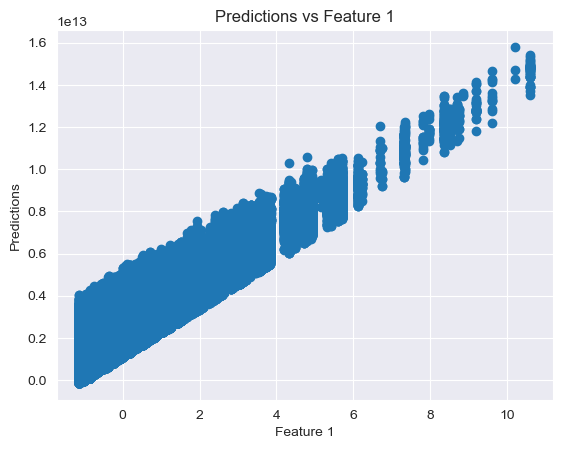

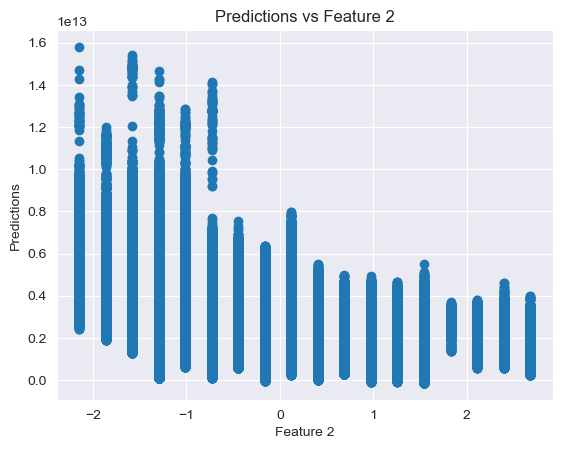

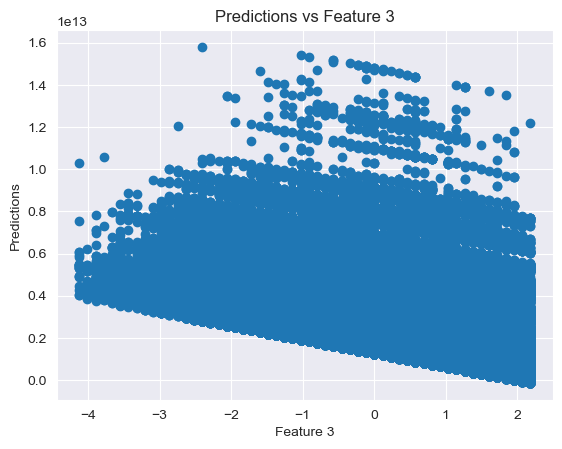

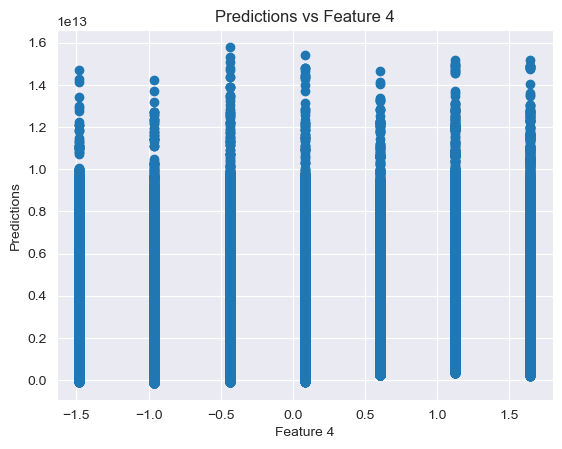

In [142]:
# X-Werte (Designmatrix)
X = X_poly_scaled

# Vorhersagen
predictions = model_L1.predict(X)

# Anzahl der Spalten in der Designmatrix
num_columns = X.shape[1]

# Plot für jede Spalte erstellen
for column in range(num_columns):
    plt.figure()
    plt.scatter(X[:, column], predictions)
    plt.xlabel(f'Feature {column+1}')
    plt.ylabel('Predictions')
    plt.title(f'Predictions vs Feature {column+1}')
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

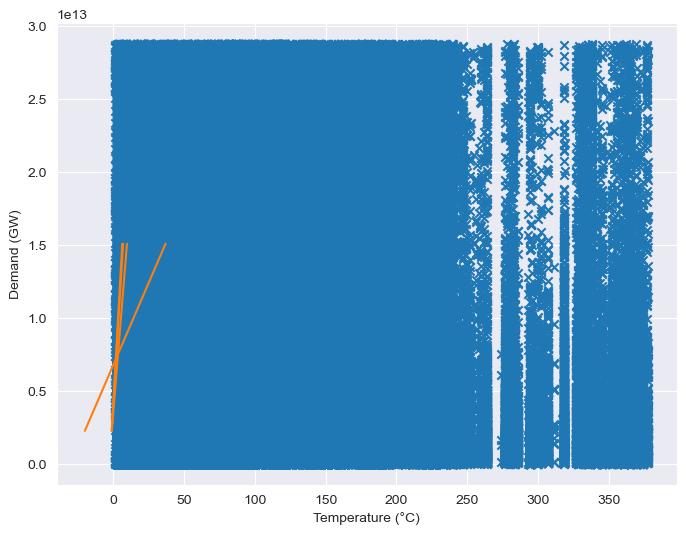

In [139]:
plot_scikit_output (xp, yp, model_L1)